## Business Goal

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Understanding and Exploration

In [1]:
# Importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
%matplotlib inline

In [2]:
# Importing the dataset
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Information on housing dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Data Cleaning

Lets clean the columns having null values

In [4]:
# Finding number of null values in LotFrontage
housing['LotFrontage'].isnull().sum()

259

In [5]:
# Finding percentage of null values in LotFrontage
(housing['LotFrontage'].isnull().sum()/len(housing.index))*100

17.73972602739726

Since percentage of null values is considerable, we will impute these missing values

In [6]:
# Finding percentiles of LotFrontage
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We will replace the null values with median value

In [7]:
# Replacing the LotFrontage null values with median
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

In [8]:
# Number of null values after imputation
housing['LotFrontage'].isnull().sum()

0

In [9]:
# Percentage of null values in Alley
(housing['Alley'].isnull().sum()/len(housing.index))*100

93.76712328767123

We see that 93% of values in Alley are null and these null values represent 'No_alley_access'. However, since the percentage of one value is very high, we will drop this column

In [10]:
# Dropping column Alley
housing = housing.drop(['Alley'], axis = 1)

In [11]:
# Percentage of null values in MasVnrType
(housing['MasVnrType'].isnull().sum()/len(housing.index))*100

0.547945205479452

In [12]:
# Checking values present in MasVnrType
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

We will impute the missing values with 'None' in column MasVnrType

In [13]:
# Imputing missing values in MasVnrType
housing['MasVnrType'] = housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0])

In [14]:
# Checking count of values in MasVnrType
housing['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
# Percentage of null values in MasVnrArea
(housing['MasVnrArea'].isnull().sum()/len(housing.index))*100

0.547945205479452

In [16]:
# Checking percentiles of MasVanArea
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

We will impute the null values with value 0 as it is median, a corrective representative and also corresponding values of MasVnrType are None 

In [17]:
# Imputing null values with median
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

In [18]:
# Checking number of null values in MasVnrArea
housing['MasVnrArea'].isnull().sum()

0

In [19]:
# Percentage of null values in BsmtQual
(housing['BsmtQual'].isnull().sum()/len(housing.index))*100

2.5342465753424657

The NA values of BmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 represents No Basement

In [20]:
# Imputing null values of BsmtQuality with 'No_Basement'
housing['BsmtQual'] = housing['BsmtQual'].fillna('No_Basement')

In [21]:
# Checking number of null values in BsmtQual
housing['BsmtQual'].isnull().sum()

0

In [22]:
# Checking percentage of null values in BsmtCond
(housing['BsmtCond'].isnull().sum()/len(housing.index))*100

2.5342465753424657

In [23]:
# Imputing null values of BsmtCond with 'No_Basement'
housing['BsmtCond'] = housing['BsmtCond'].fillna('No_Basement')

In [24]:
# Checking number of null values in BsmtCond
housing['BsmtCond'].isnull().sum()

0

In [25]:
# Checking percentage of null values in BsmtExposure
(housing['BsmtExposure'].isnull().sum()/len(housing.index))*100

2.6027397260273974

In [26]:
# Imputing null values with 'No_Basement'
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('No_Basement')

In [27]:
# Number of null values in BsmtExposure
housing['BsmtExposure'].isnull().sum()

0

In [28]:
# Percentage of null values in BsmtFinType1
(housing['BsmtFinType1'].isnull().sum()/len(housing.index))*100

2.5342465753424657

In [29]:
# Imputing null values of BsmtFinType1 with 'No_Basement'
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('No_Basement')

In [30]:
# Checking number of null values in BsmtFinType1
housing['BsmtFinType1'].isnull().sum()

0

In [31]:
# Percentage of null values in BsmtFinType2
(housing['BsmtFinType2'].isnull().sum()/len(housing.index))*100

2.6027397260273974

In [32]:
# Imputing null values of BsmtFinType2 with 'No_Basement'
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('No_Basement')

In [33]:
# Checking number of null values in BsmtFinType2
housing['BsmtFinType2'].isnull().sum()

0

In [34]:
# Checking percentage of null values in Electrical
(housing['Electrical'].isnull().sum()/len(housing.index))*100

0.0684931506849315

In [35]:
# Checking values in Electrical
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
# Imputing null values with 'SBrkr'
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])

In [37]:
# Checking values in Electrical
housing['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
# Number of null values in Electrical
housing['Electrical'].isnull().sum()

0

We will impute the NA values of FirePlaceQu with 'No_FirePlace

In [39]:
# Percentage of null values in FirePlaceQual
(housing['FireplaceQu'].isnull().sum()/len(housing.index))*100

47.26027397260274

In [40]:
# Replacing null values with 'No_FirePlace' 
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_FirePlace')

In [41]:
# Checking number of null values in FireplaceQu
housing['FireplaceQu'].isnull().sum()

0

We will impute NA values of GarageType with 'No_Garage'

In [42]:
# Percentage of null values in GarageType
(housing['GarageType'].isnull().sum()/len(housing.index))*100

5.5479452054794525

In [43]:
# Imputing null values with 'No_Garage'
housing['GarageType'] = housing['GarageType'].fillna('No_Garage')

In [44]:
# Checking number of null values in GarageType
housing['GarageType'].isnull().sum()

0

In [45]:
# Percentage of null values in GarageYrBlt
(housing['GarageYrBlt'].isnull().sum()/len(housing.index))*100

5.5479452054794525

We will impute GarageYrBlt with value 0 as do not have Garages

In [46]:
# Imputing null values with 0
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

In [47]:
# Checking number of null values in GarageYrBlt
housing['GarageYrBlt'].isnull().sum()

0

In [48]:
# Percentage of GarageQual
(housing['GarageQual'].isnull().sum()/len(housing.index))*100

5.5479452054794525

In [49]:
# Imputing null values in GarageQual with 'No_Garage'
housing['GarageQual'] = housing['GarageQual'].fillna('No_Garage')

In [50]:
# Checking number of null values in GarageQual
housing['GarageQual'].isnull().sum()

0

In [51]:
# Percentage of null values in GarageFinish
(housing['GarageFinish'].isnull().sum()/len(housing.index))*100

5.5479452054794525

In [52]:
# Imputing null values of GarageFinish with 'No_Garage'
housing['GarageFinish'] = housing['GarageFinish'].fillna('No_Garage')

In [53]:
# Number of null values in GarageFinish
housing['GarageFinish'].isnull().sum()

0

In [54]:
# Percenatge of null values in GarageCond
(housing['GarageCond'].isnull().sum()/len(housing.index))*100

5.5479452054794525

In [55]:
# Imputing the null values of GarageCond with 'No_Garage'
housing['GarageCond'] = housing['GarageCond'].fillna('No_Garage')

In [56]:
# Number of null values in GarageCond
housing['GarageCond'].isnull().sum()

0

In [57]:
# Imputing null values with 'No_Pool' in PoolQC
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')

In [58]:
# Number of null values in PoolQC
housing['PoolQC'].isnull().sum()

0

In [59]:
# Imputing null values with 'No_Fence' in Fence
housing['Fence'] = housing['Fence'].fillna('No_Fence')

In [60]:
# Number of null values in Fence
housing['Fence'].isnull().sum()

0

In [61]:
# Imputing null values with 'None' in MiscFeature
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

In [62]:
# Number of null values in MiscFeature
housing['MiscFeature'].isnull().sum()

0

We will find columns if we have any skewed data

In [63]:
def skewedcolumns():
    column = []
    housing_categorical = housing.select_dtypes(include=['object'])
    for col in housing_categorical:
        if((housing[col].value_counts().max()/len(housing.index)) >= 0.8):
            column.append(col)
    return column

skewed_columns = skewedcolumns()
print(skewed_columns)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [64]:
# Dropping the skewed columns
housing.drop(skewed_columns, axis = 1, inplace = True)

In [65]:
# Checking info on housing dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [66]:
# Providing values to LotShape as per their order
housing[['LotShape']] = housing[['LotShape']].apply(lambda x : x.map({'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4}))

In [67]:
# Providing values to LotConfig as per their order
housing[['LotConfig']] = housing[['LotConfig']].apply(lambda x : x.map({'Inside' : 1, 'Corner' : 2,
                                                                        'CulDSac' : 3, 'FR2' : 4, 'FR3' : 5}))

In [68]:
# Providing values to HouseStyle as per their order
housing[['HouseStyle']] = housing[['HouseStyle']].apply(lambda x : x.map({'1Story' : 1, '2Story' : 4,
                                                                          '1.5Fin' : 2, 'SLvl' : 8, 'SFoyer' : 7, 
                                                                         '1.5Unf' : 3, '2.5Fin' : 5, '2.5Unf' : 6}))

In [69]:
# Providing values to MasVnrType as per their order
housing[['MasVnrType']] = housing[['MasVnrType']].apply(lambda x : x.map({'None' : 0, 'BrkFace' : 1, 'Stone' : 1,
                                                                          'BrkCmn' : 1, 'CBlock' : 1}))

In [70]:
# Providing values to ExterQual as per their order
housing[['ExterQual']] = housing[['ExterQual']].apply(lambda x : x.map({'Po' : 1, 'Fa' : 2, 'TA' : 3,
                                                                          'Gd' : 4, 'Ex' : 5}))

In [71]:
# Providing values to BsmtQual as per their order
housing[['BsmtQual']] = housing[['BsmtQual']].apply(lambda x : x.map({'Po' : 1, 'Fa' : 2, 'TA' : 3,
                                                                          'Gd' : 4, 'Ex' : 5, 'No_Basement' : 0}))

In [72]:
# Providing values to BsmtExposure as per their order
housing[['BsmtExposure']] = housing[['BsmtExposure']].apply(lambda x : x.map({'No' : 1, 'Mn' : 2, 'Av' : 3,
                                                                          'Gd' : 4, 'No_Basement' : 0}))

In [73]:
# Providing values to BsmtFinType1 as per their order
housing[['BsmtFinType1']] = housing[['BsmtFinType1']].apply(lambda x : x.map({'Unf' : 1, 'LwQ' : 2, 'Rec' : 3,
                                                                          'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6,
                                                                              'No_Basement' : 0}))

In [74]:
# Providing values to HeatingQC as per their order
housing[['HeatingQC']] = housing[['HeatingQC']].apply(lambda x : x.map({'Po' : 1, 'Fa' : 2, 'TA' : 3,
                                                                          'Gd' : 4, 'Ex' : 5}))

In [75]:
# Providing values to KitchenQual as per their order
housing[['KitchenQual']] = housing[['KitchenQual']].apply(lambda x : x.map({'Po' : 1, 'Fa' : 2, 'TA' : 3,
                                                                          'Gd' : 4, 'Ex' : 5}))

In [76]:
# Providing values to FireplaceQu as per their order
housing[['FireplaceQu']] = housing[['FireplaceQu']].apply(lambda x : x.map({'Po' : 1, 'Fa' : 2, 'TA' : 3,
                                                                          'Gd' : 4, 'Ex' : 5, 'No_FirePlace' : 0}))

In [77]:
# Providing values to GarageFinish as per their order
housing[['GarageFinish']] = housing[['GarageFinish']].apply(lambda x : x.map({'Unf' : 1, 'RFn' : 2, 'Fin' : 3,
                                                                          'No_Garage' : 0}))

In [78]:
# Checking housing dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LotConfig      1460 non-null   int64  
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   int64  
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   int64  
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

We will find the age of Garage when it was sold, incase of no garage, we will keep it as zero

In [79]:
# Creating new column 'Garage_Age_at_Sold'

housing['Garage_Age_at_Sold'] = housing.apply(lambda x: x['GarageYrBlt'] if x['GarageYrBlt'] == 0
                                              else x['YrSold']-x['GarageYrBlt'], axis = 1)

Similarly, we will find age of housee when it was remodelled

In [80]:
# Creating new column 'AgeYr_Remod'
housing['AgeYr_Remod'] = housing['YearRemodAdd'] - housing['YearBuilt']
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Garage_Age_at_Sold,AgeYr_Remod
0,1,60,RL,65.0,8450,4,1,CollgCr,4,7,...,0,0,0,0,0,2,2008,208500,5.0,0
1,2,20,RL,80.0,9600,4,4,Veenker,1,6,...,0,0,0,0,0,5,2007,181500,31.0,0
2,3,60,RL,68.0,11250,3,1,CollgCr,4,7,...,0,0,0,0,0,9,2008,223500,7.0,1
3,4,70,RL,60.0,9550,3,2,Crawfor,4,7,...,272,0,0,0,0,2,2006,140000,8.0,55
4,5,60,RL,84.0,14260,3,4,NoRidge,4,8,...,0,0,0,0,0,12,2008,250000,8.0,0


We will find the age of house when it was sold

In [81]:
# Creating age of house when sold
housing['AgeYr_House'] = housing['YrSold'] - housing['YearRemodAdd']
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Garage_Age_at_Sold,AgeYr_Remod,AgeYr_House
0,1,60,RL,65.0,8450,4,1,CollgCr,4,7,...,0,0,0,0,2,2008,208500,5.0,0,5
1,2,20,RL,80.0,9600,4,4,Veenker,1,6,...,0,0,0,0,5,2007,181500,31.0,0,31
2,3,60,RL,68.0,11250,3,1,CollgCr,4,7,...,0,0,0,0,9,2008,223500,7.0,1,6
3,4,70,RL,60.0,9550,3,2,Crawfor,4,7,...,0,0,0,0,2,2006,140000,8.0,55,36
4,5,60,RL,84.0,14260,3,4,NoRidge,4,8,...,0,0,0,0,12,2008,250000,8.0,0,8


In [82]:
# Dropping the MoSold column as we do not need it for further analysis
housing = housing.drop(['MoSold'], axis = 1)
housing.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,Garage_Age_at_Sold,AgeYr_Remod,AgeYr_House
0,1,60,RL,65.0,8450,4,1,CollgCr,4,7,...,0,0,0,0,0,2008,208500,5.0,0,5
1,2,20,RL,80.0,9600,4,4,Veenker,1,6,...,0,0,0,0,0,2007,181500,31.0,0,31
2,3,60,RL,68.0,11250,3,1,CollgCr,4,7,...,0,0,0,0,0,2008,223500,7.0,1,6
3,4,70,RL,60.0,9550,3,2,Crawfor,4,7,...,272,0,0,0,0,2006,140000,8.0,55,36
4,5,60,RL,84.0,14260,3,4,NoRidge,4,8,...,0,0,0,0,0,2008,250000,8.0,0,8


In [83]:
# Subsetting the categorical columns for creating dummy variables
housing_categorical = housing.select_dtypes(include = ['object'])
housing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   Neighborhood  1460 non-null   object
 2   RoofStyle     1460 non-null   object
 3   Exterior1st   1460 non-null   object
 4   Exterior2nd   1460 non-null   object
 5   Foundation    1460 non-null   object
 6   GarageType    1460 non-null   object
dtypes: object(7)
memory usage: 80.0+ KB


In [84]:
# Subsetting numerical columns for further transformations & analysis
housing_numeric = housing.select_dtypes(include = ['int64', 'float64'])
housing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   LotShape            1460 non-null   int64  
 5   LotConfig           1460 non-null   int64  
 6   HouseStyle          1460 non-null   int64  
 7   OverallQual         1460 non-null   int64  
 8   OverallCond         1460 non-null   int64  
 9   YearBuilt           1460 non-null   int64  
 10  YearRemodAdd        1460 non-null   int64  
 11  MasVnrType          1460 non-null   int64  
 12  MasVnrArea          1460 non-null   float64
 13  ExterQual           1460 non-null   int64  
 14  BsmtQual            1460 non-null   int64  
 15  BsmtExposure        1460 non-null   int64  
 16  BsmtFi

In [85]:
# Dropping the Id, YearBuilt, YearRemodAdd, GarageYrBlt, YrSold columns as we do not need them for our further analysis
housing = housing.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1)

In [86]:
#Creating dummy variables for categorical data
housing_dummies = pd.get_dummies(housing_categorical, drop_first = True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [87]:
# Dropping the columns having categorical data after dummy variables creation
housing = housing.drop(list(housing_categorical.columns), axis = 1)

In [88]:
# Concatenating the housing dataframe and dummy variables dataframe
housing= pd.concat([housing, housing_dummies], axis = 1)

In [89]:
# Checking the housing dataframe
housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage
0,60,65.0,8450,4,1,4,7,5,1,196.0,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,4,4,1,6,8,0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,3,1,4,7,5,1,162.0,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,3,2,4,7,5,0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,3,4,4,8,5,1,350.0,...,1,0,0,0,1,0,0,0,0,0


#### Data Exploration

In [90]:
# Dropping these colums from housing_numeric dataset
housing_numeric = housing_numeric.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1)

In [91]:
# Correlation of numeric data of housing
housing_numeric_corr = housing_numeric.corr()
pd.set_option('display.max_columns', None)
housing_numeric_corr

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Garage_Age_at_Sold,AgeYr_Remod,AgeYr_House
MSSubClass,1.000000,-0.356718,-0.139781,0.115361,-0.037573,0.469623,0.032628,-0.059316,0.026401,0.023573,0.016178,0.051122,0.051150,0.027389,-0.069836,-0.065649,-0.140759,-0.238518,-0.019458,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.012383,0.040380,-0.045569,-0.039201,-0.033077,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.084284,-0.101202,-0.000137,-0.041968
LotFrontage,-0.356718,1.000000,0.304522,-0.191420,0.046862,-0.023870,0.234812,-0.053281,0.119304,0.178469,0.165567,0.141836,0.161479,0.072566,0.214367,0.042463,0.124098,0.363472,0.090051,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.169829,0.320518,0.233221,0.224425,0.216575,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.334771,-0.035589,-0.073682,-0.082957
LotArea,-0.139781,0.304522,1.000000,-0.315484,0.131099,-0.029586,0.105806,-0.005636,0.030547,0.103321,0.055570,0.072336,0.228830,0.058995,0.214103,0.111170,-0.002618,0.260833,0.003581,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.067864,0.190015,0.271364,0.185332,0.124756,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,0.043058,-0.005926,-0.014709
LotShape,0.115361,-0.191420,-0.315484,1.000000,-0.276675,-0.037859,-0.198994,0.033747,-0.047904,-0.089800,-0.188668,-0.211557,-0.183540,-0.111492,-0.157718,-0.060419,-0.014179,-0.200469,-0.119556,-0.189251,-0.089380,0.007973,-0.212741,-0.064638,-0.057729,-0.184213,-0.116576,-0.060028,0.094870,-0.157933,-0.137148,-0.202019,-0.193112,-0.236527,-0.194984,-0.173472,-0.161717,-0.093135,0.095092,-0.033801,-0.065182,-0.047100,-0.028638,-0.267759,0.168957,0.135006,0.177934
LotConfig,-0.037573,0.046862,0.131099,-0.276675,1.000000,0.051744,0.064471,0.012098,0.036367,0.042333,0.051383,0.077510,0.067975,0.050072,0.065869,0.010789,-0.028162,0.044083,0.050533,0.049946,0.031546,-0.024011,0.060729,0.027993,0.044611,0.060221,0.040901,0.036070,-0.025409,0.034606,0.026809,0.043008,0.036306,0.068308,0.096748,0.069110,0.056153,0.058469,-0.021271,0.058911,-0.016117,0.029679,0.031774,0.092316,-0.052868,-0.038614,-0.075115
HouseStyle,0.469623,-0.023870,-0.029586,-0.037859,0.051744,1.000000,0.110693,0.065133,0.053869,0.083493,-0.006734,0.099843,0.177989,0.039908,-0.060318,-0.036481,-0.182726,-0.260167,0.002481,-0.257178,0.517224,0.043380,0.244481,-0.005547,0.068701,0.138205,0.349193,0.209238,0.020315,0.020049,0.243387,0.084721,0.057214,0.066142,0.058288,0.032963,0.040113,0.075113,0.029690,-0.030463,-0.002768,0.079468,-0.023195,0.063547,-0.024705,0.006521,-0.056688
OverallQual,0.032628,0.234812,0.105806,-0.198994,0.064471,0.110693,1.000000,-0.091932,0.389512,0.407252,0.726278,0.629379,0.296517,0.232503,0.239666,-0.059119,0.308159,0.537808,0.457083,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.673331,0.427452,0.396765,0.490788,0.556863,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.428661,-0.241731,-0.552570
OverallCond,-0.059316,-0.053281,-0.005636,0.033747,0.012098,0.065133,-0.091932,1.000000,-0.153538,-0.125694,-0.138942,-0.164996,-0.056732,-0.014479,-0.046231,0.040229,-0.136841,-0.171098,-0.014105,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.026707,-0.057583,-0

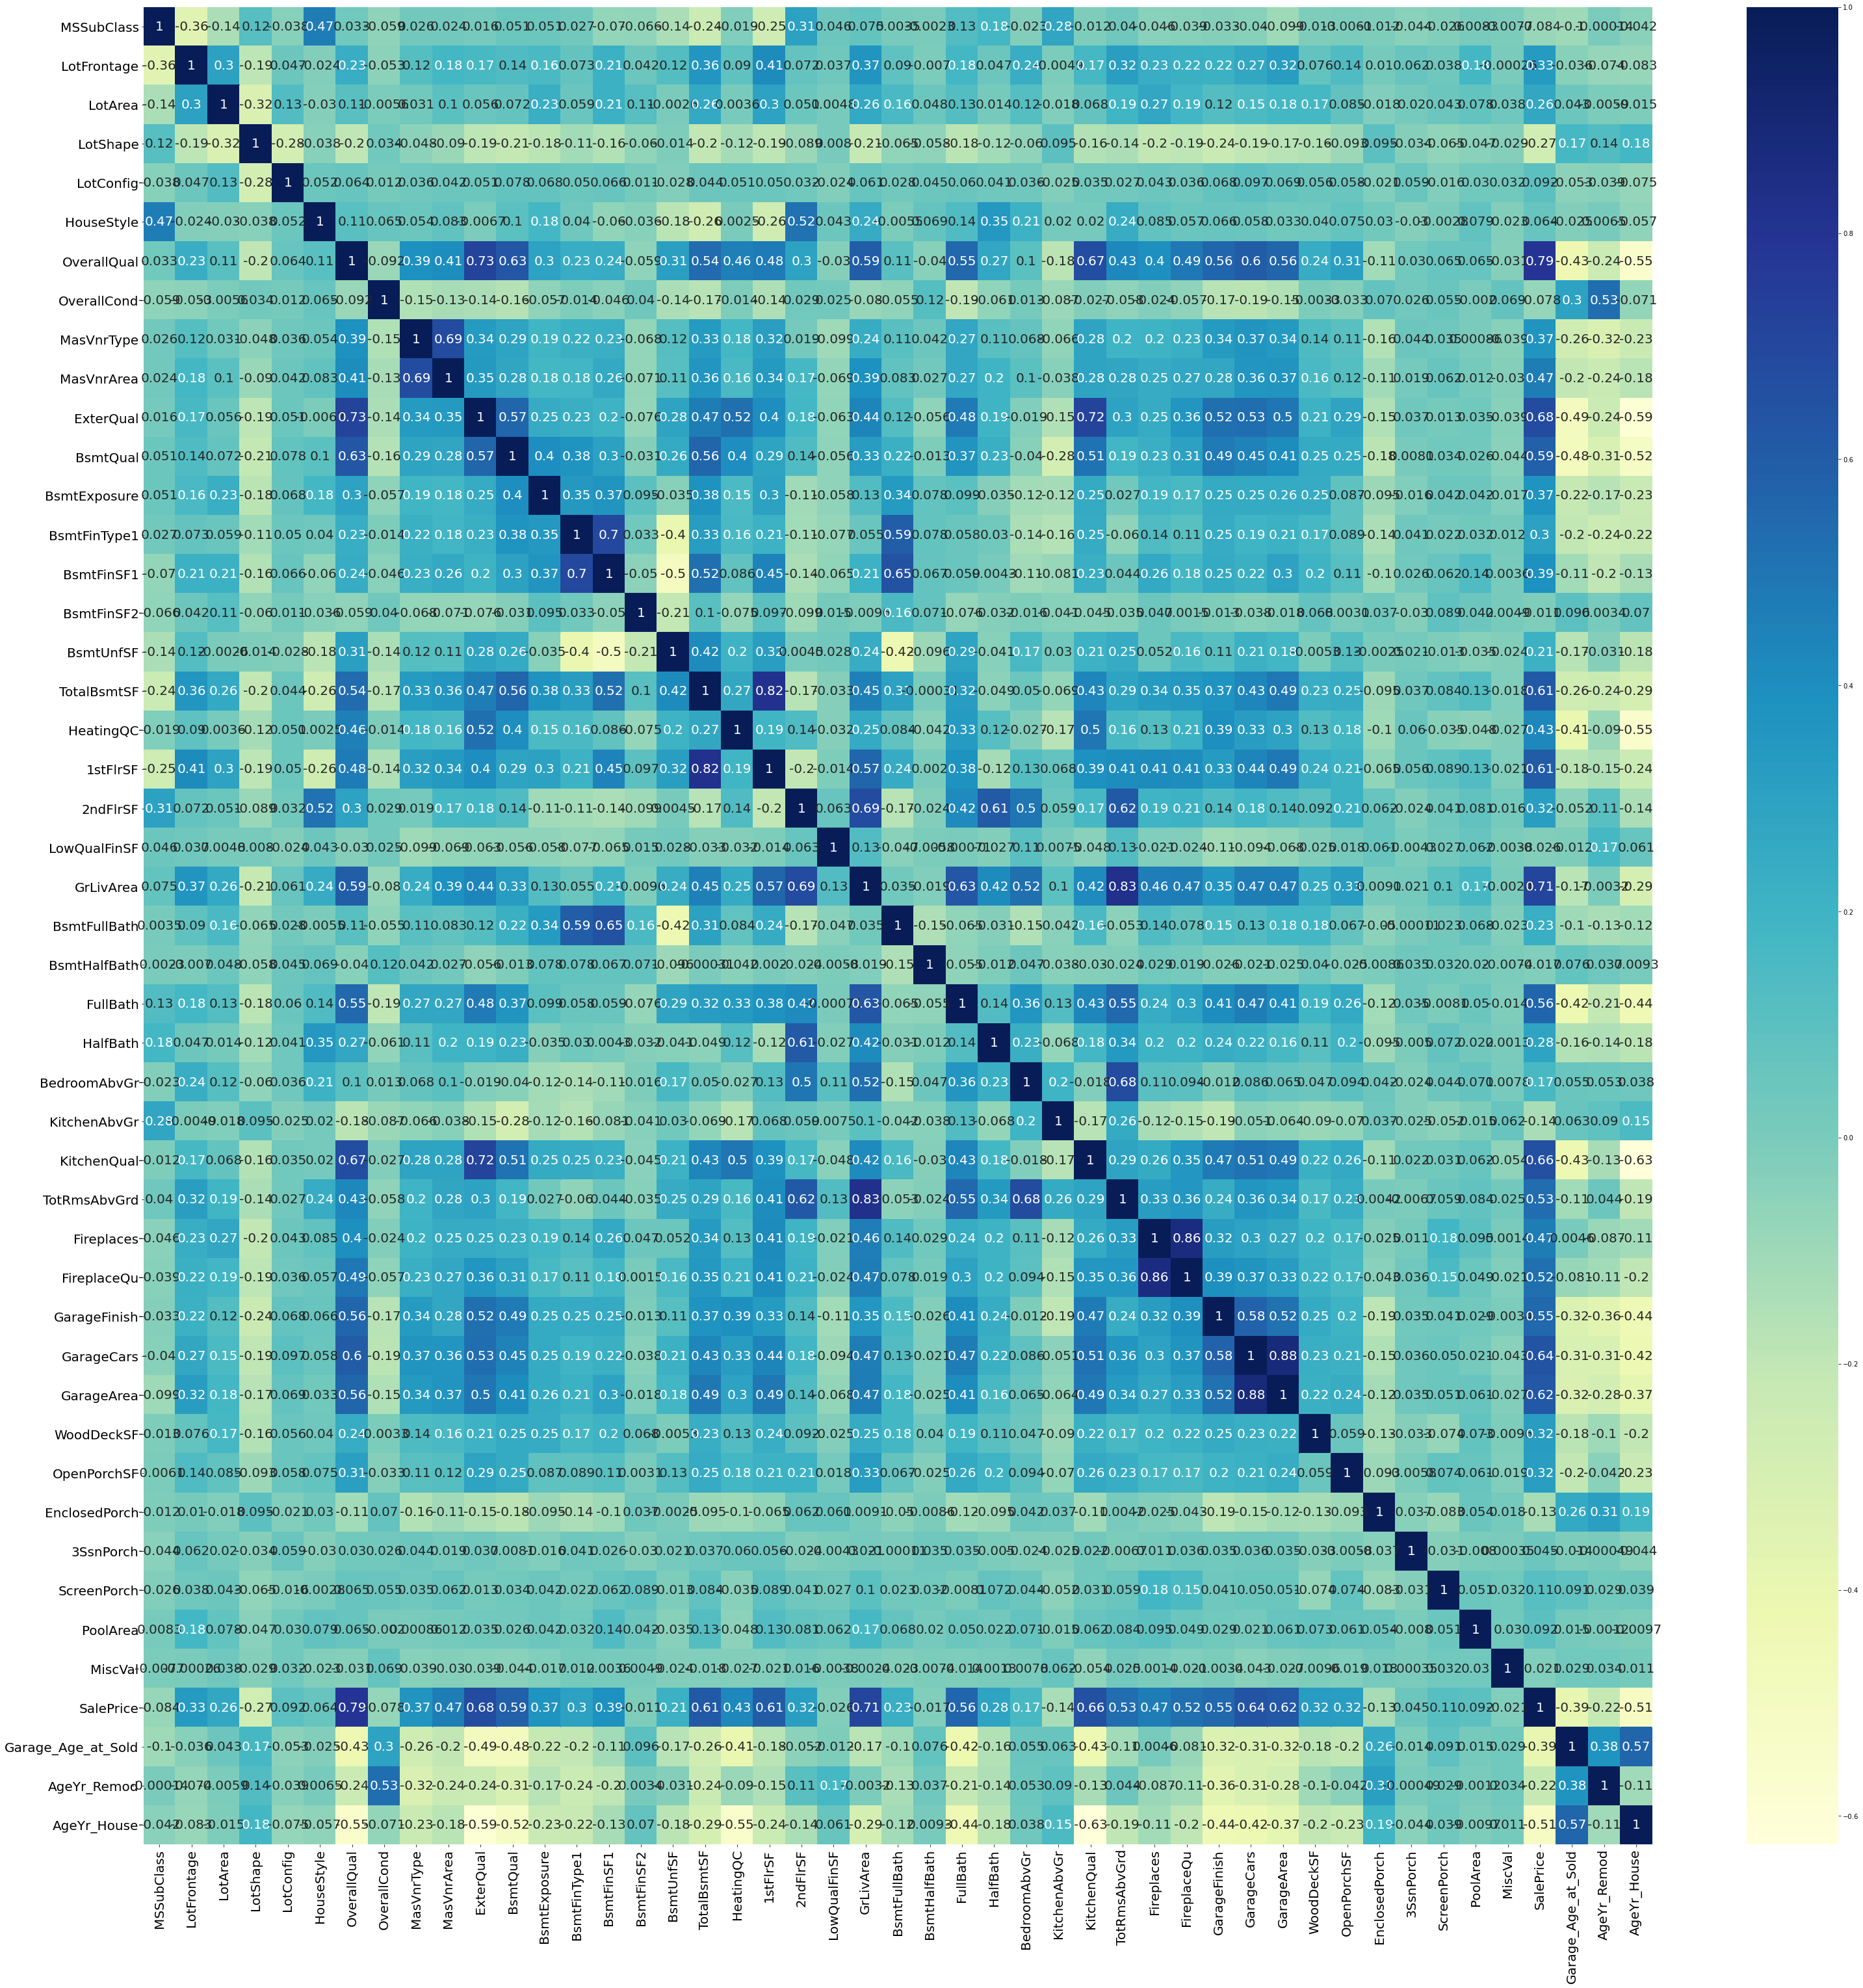

In [92]:
# Plot heat map on correlation for housing_numeric dataset
plt.figure(figsize = (52,52))
sns.heatmap(housing_numeric_corr, cmap = 'YlGnBu', annot = True, annot_kws = {'size' : 20})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

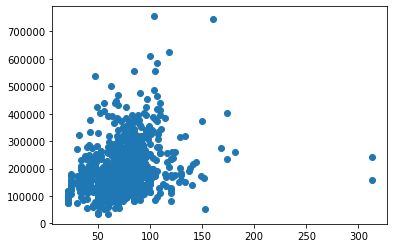

In [93]:
# Creating scatter plot for LotFrontage vs SalePrice
plt.scatter(data = housing, x = "LotFrontage", y = 'SalePrice')
plt.show()

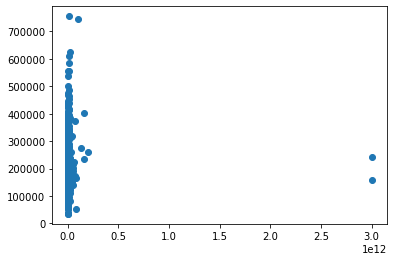

In [94]:
# Creating Power Transformation to LotFrontage
housing['LotFrontage_Power5'] = np.power((housing['LotFrontage']),5)
plt.scatter(data = housing, x = "LotFrontage_Power5", y = 'SalePrice')
plt.show()

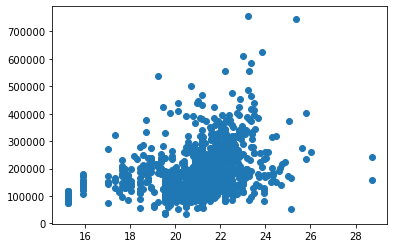

In [95]:
# Creating Log Transformation to LotFrontage_Power5
housing['LotFrontage_Power5_Log'] = np.log(housing['LotFrontage_Power5'])
plt.scatter(data = housing, x = "LotFrontage_Power5_Log", y = 'SalePrice')
plt.show()

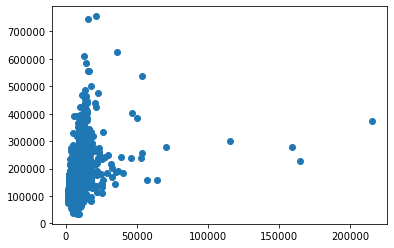

In [96]:
# Checking scatter plot of LotArea vs SalePrice
plt.scatter(data = housing, x = "LotArea", y = 'SalePrice')
plt.show()

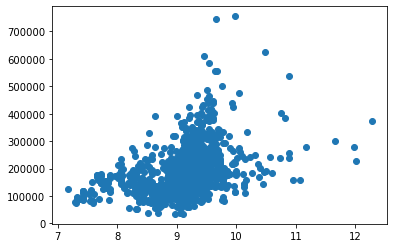

In [97]:
# Creating log transformation to LotArea
housing['LotArea_Log'] = np.log(housing['LotArea'])
plt.scatter(data = housing, x = "LotArea_Log", y = 'SalePrice')
plt.show()

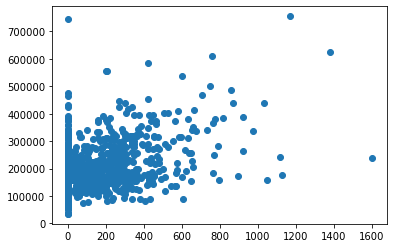

In [98]:
# Creating scatter plot for MasVnrArea vs SalePrice
plt.scatter(data = housing, x = "MasVnrArea", y = 'SalePrice')
plt.show()

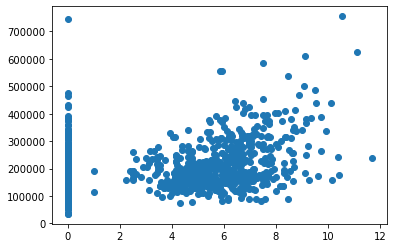

In [99]:
# Creating CubeRoot transformation to MasVnrArea
housing['MasVnrArea_cbrt'] = np.cbrt(housing['MasVnrArea'])
plt.scatter(data = housing, x = "MasVnrArea_cbrt", y = 'SalePrice')
plt.show()

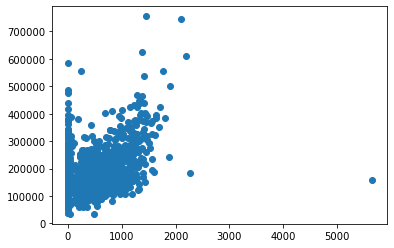

In [100]:
# Creating scatter plot for BsmtFinSF1 vs SalePrice
plt.scatter(data = housing, x = "BsmtFinSF1", y = 'SalePrice')
plt.show()

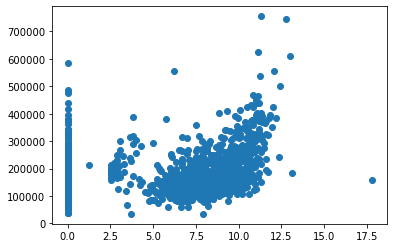

In [101]:
# Creating CubeRoot transformation to BsmtFinSF1
housing['BsmtFinSF1_cbrt'] = np.cbrt(housing['BsmtFinSF1'])
plt.scatter(data = housing, x = "BsmtFinSF1_cbrt", y = 'SalePrice')
plt.show()

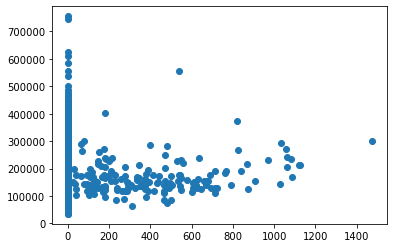

In [102]:
# Creating scatter plot of BsmtFinSF2 vs SalePrice
plt.scatter(data = housing, x = "BsmtFinSF2", y = 'SalePrice')
plt.show()

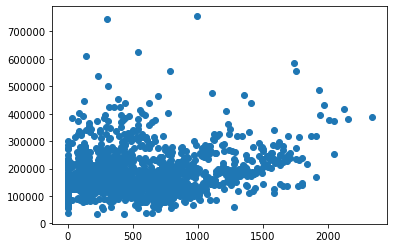

In [103]:
# Creating scatterplot for BsmtUnf vs SalePrice
plt.scatter(data = housing, x = "BsmtUnfSF", y = 'SalePrice')
plt.show()

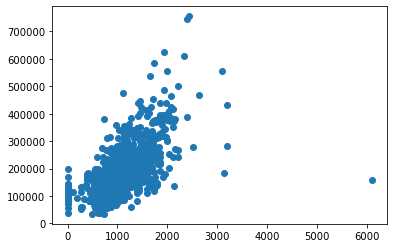

In [104]:
# Creating scatterplot for TotalBsmtSF vs SalePrice
plt.scatter(data = housing, x = "TotalBsmtSF", y = 'SalePrice')
plt.show()

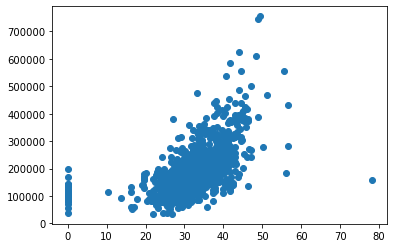

In [105]:
# Creating SqrtRoot transformation to TotalBsmtSF
housing['TotalBsmtSF_sqrt'] = np.sqrt(housing['TotalBsmtSF'])
plt.scatter(data = housing, x = "TotalBsmtSF_sqrt", y = 'SalePrice')
plt.show()

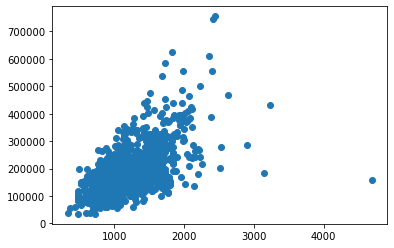

In [106]:
# Creating scatterplot for 1stFlrSF vs SalePrice
plt.scatter(data = housing, x = "1stFlrSF", y = 'SalePrice')
plt.show()

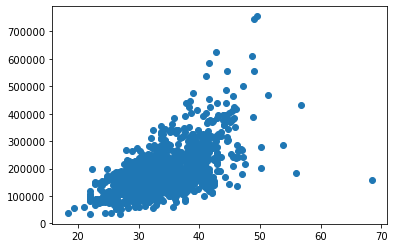

In [107]:
# Creating sqrt transformation to 1stFlrSF
housing['1stFlrSF_sqrt'] = np.sqrt(housing['1stFlrSF'])
plt.scatter(data = housing, x = "1stFlrSF_sqrt", y = 'SalePrice')
plt.show()

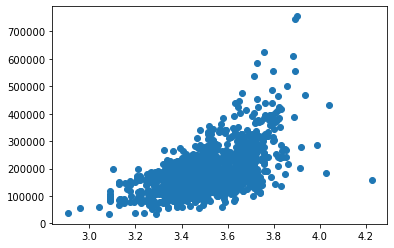

In [108]:
# Creating Log Transformation to 1stFlrSF_cbrt
housing['1stFlrSF_sqrt_Log'] = np.log(housing['1stFlrSF_sqrt'])
plt.scatter(data = housing, x = "1stFlrSF_sqrt_Log", y = 'SalePrice')
plt.show()

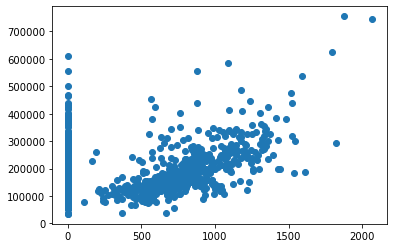

In [109]:
# Creating scatterplot for 2ndFlrSF vs SalePrice
plt.scatter(data = housing, x = "2ndFlrSF", y = 'SalePrice')
plt.show()

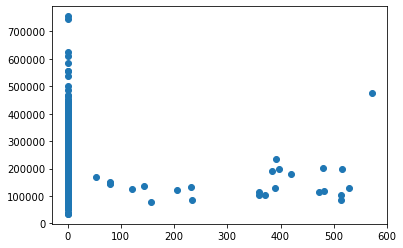

In [110]:
# Plotting scatter plot of LowQualFinSF vs SalePrice
plt.scatter(data = housing, x = "LowQualFinSF", y = 'SalePrice')
plt.show()

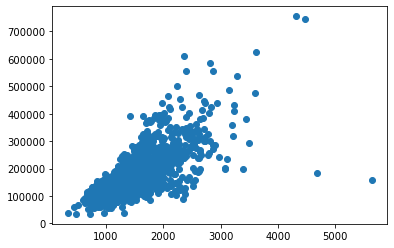

In [111]:
# Creating scatterplot of GrivLivArea vs SalePrice
plt.scatter(data = housing, x = "GrLivArea", y = 'SalePrice')
plt.show()

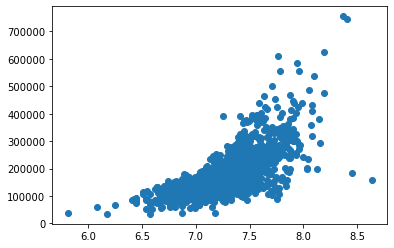

In [112]:
# Applying log transformation to GrLivAr
housing['GrLivArea_Log'] = np.log(housing['GrLivArea'])
plt.scatter(data = housing, x = "GrLivArea_Log", y = 'SalePrice')
plt.show()

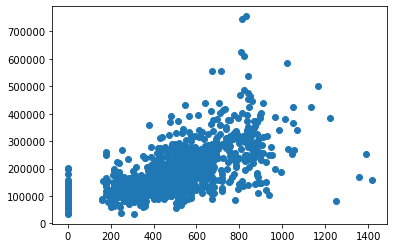

In [113]:
# Creating scatterplot for GarageArea vs SalePrice
plt.scatter(data = housing, x = "GarageArea", y = 'SalePrice')
plt.show()

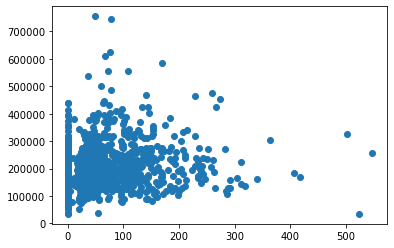

In [114]:
# Creating scatter plot for OpenPorchSF vs SalePrice
plt.scatter(data = housing, x = "OpenPorchSF", y = 'SalePrice')
plt.show()

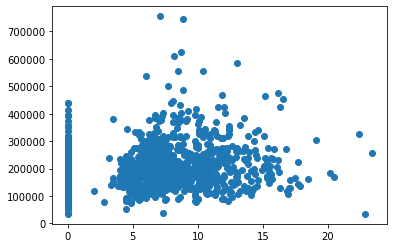

In [115]:
# Creating sqrt transformation to OpenPorchSF
housing['OpenPorchSF_sqrt'] = np.sqrt(housing['OpenPorchSF'])
plt.scatter(data = housing, x = "OpenPorchSF_sqrt", y = 'SalePrice')
plt.show()

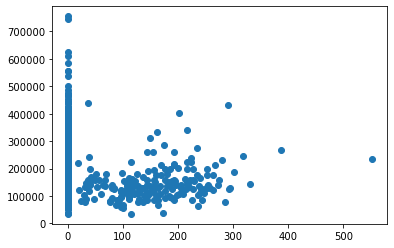

In [116]:
# Creating scatterplot for EnclosedPorch vs SalePrice
plt.scatter(data = housing, x = "EnclosedPorch", y = 'SalePrice')
plt.show()

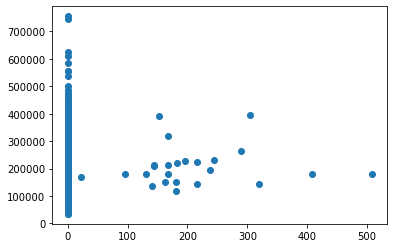

In [117]:
# Creating scatterplot of 3SsnPorch vs SalePrice
plt.scatter(data = housing, x = "3SsnPorch", y = 'SalePrice')
plt.show()

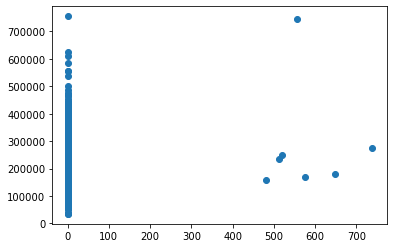

In [118]:
# Creating scatterplot for PoolArea vs SalePrice
plt.scatter(data = housing, x = "PoolArea", y = 'SalePrice')
plt.show()

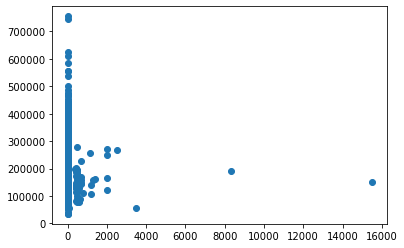

In [119]:
# Creating scatterplot for MiscVal vs SalePrice
plt.scatter(data = housing, x = "MiscVal", y = 'SalePrice')
plt.show()

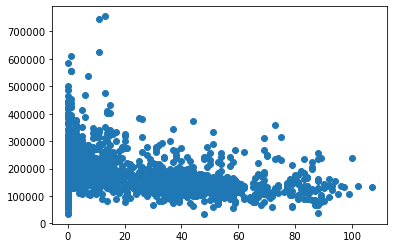

In [120]:
# Creating scatter plot for Garage_Age_at_Sold
plt.scatter(data = housing, x = "Garage_Age_at_Sold", y = 'SalePrice')
plt.show()

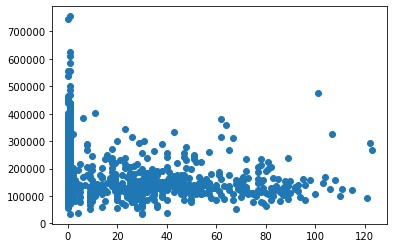

In [121]:
# Creating scatterplot for AgeYr_Remod
plt.scatter(data = housing, x = "AgeYr_Remod", y = 'SalePrice')
plt.show()

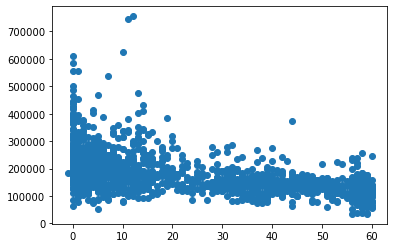

In [122]:
# Creating scatterplot for AgeYr_House
plt.scatter(data = housing, x = "AgeYr_House", y = 'SalePrice')
plt.show()

In [123]:
housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Garage_Age_at_Sold,AgeYr_Remod,AgeYr_House,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,LotFrontage_Power5,LotFrontage_Power5_Log,LotArea_Log,MasVnrArea_cbrt,BsmtFinSF1_cbrt,TotalBsmtSF_sqrt,1stFlrSF_sqrt,1stFlrSF_sqrt_Log,GrLivArea_Log,OpenPorchSF_sqrt
0,60,65.0,8450,4,1,4,7,5,1,196.0,4,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,2,2,548,0,61,0,0,0,0,0,208500,5.0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1.160291e+09,20.871936,9.041922,5.808786,8.904337,29.257478,29.257478,3.376135,7.444249,7.810250
1,20,80.0,9600,4,4,1,6,8,0,0.0,3,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,2,2,460,298,0,0,0,0,0,0,181500,31.0,0,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3.276800e+09,21.910133,9.169518,0.000000,9.926122,35.524639,35.524639,3.570227,7.140453,0.000000
2,60,68.0,11250,3,1,4,7,5,1,162.0,4,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,2,2,608,0,42,0,0,0,0,0,223500,7.0,1,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1.453934e+09,21.097539,9.328123,5.451362,7.862224,30.331502,30.331502,3.412187,7.487734,6.480741
3,70,60.0,9550,3,2,4,7,5,0,0.0,3,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,1,3,642,0,35,272,0,0,0,0,140000,8.0,55,36,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,7.776000e+08,20.471723,9.164296,0.000000,6.000000,27.495454,31.000000,3.433987,7.448334,5.916080
4,60,84.0,14260,3,4,4,8,5,1,350.0,4,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,2,3,836,192,84,0,0,0,0,0,250000,8.0,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,4.182119e+09,22.154084,9.565214,7.047299,8.684546,33.837849,33.837849,3.521580,7.695303,9.165151


In [124]:
housing = housing.drop(['LotFrontage', 'LotFrontage_Power5', 'OpenPorchSF', 'GrLivArea', '1stFlrSF', '1stFlrSF_sqrt',
                       'TotalBsmtSF', 'MasVnrArea', 'LotArea', 'BsmtFinSF1'], axis = 1)

#### Data Preparation

In [125]:
# Creating target variable
y = housing.pop('SalePrice')

In [126]:
# Creating predictor variable
X = housing

In [127]:
# storing column names in cols
cols = X.columns
# Scaling the predictor variable values
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotShape', 'LotConfig', 'HouseStyle', 'OverallQual',
       'OverallCond', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       ...
       'GarageType_Detchd', 'GarageType_No_Garage', 'LotFrontage_Power5_Log',
       'LotArea_Log', 'MasVnrArea_cbrt', 'BsmtFinSF1_cbrt', 'TotalBsmtSF_sqrt',
       '1stFlrSF_sqrt_Log', 'GrLivArea_Log', 'OpenPorchSF_sqrt'],
      dtype='object', length=119)

In [128]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Ridge Regression

In [129]:
# List of alphas to tune
params_ridge = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]}

# Creating variable ridge 
ridge = Ridge()

# Cross Validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params_ridge, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 200, 300, 400, 500,
                                   600, 700, 800, 900, 1000, 1500, 2000]},
             return_train_score=True, scoring='r2', verbose=1)

In [130]:
# cv results of Ridge Regression
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013194,0.001939,0.006395,0.001356,0.01,{'alpha': 0.01},0.832666,0.773836,0.768820,0.856793,0.842536,0.814930,0.036453,11,0.874266,0.887859,0.887241,0.870412,0.875440,0.879044,0.007144
1,0.010394,0.002059,0.004596,0.001200,0.1,{'alpha': 0.1},0.833020,0.774010,0.769287,0.856941,0.842626,0.815177,0.036378,10,0.874265,0.887856,0.887239,0.870411,0.875439,0.879042,0.007144
2,0.010196,0.001831,0.006196,0.000749,1,{'alpha': 1},0.835361,0.774870,0.773432,0.857636,0.843162,0.816892,0.035626,8,0.874195,0.887746,0.887140,0.870367,0.875394,0.878968,0.007118
3,0.004607,0.003887,0.001399,0.001742,10,{'alpha': 10},0.843232,0.775403,0.792244,0.859164,0.842791,0.822567,0.032617,5,0.872759,0.886681,0.884875,0.869457,0.874466,0.877648,0.006855
4,0.012500,0.006250,0.003125,0.006250,100,{'alpha': 100},0.860042,0.772349,0.813755,0.865423,0.834288,0.829171,0.033941,1,0.863884,0.880429,0.874356,0.862271,0.867723,0.869733,0.006778
5,0.000000,0.000000,0.003125,0.006251,200,{'alpha': 200},0.866301,0.767175,0.818584,0.866250,0.826993,0.829061,0.036643,2,0.856812,0.874834,0.867219,0.855972,0.861682,0.863304,0.007026
6,0.009375,0.007654,0.000000,0.000000,300,{'alpha': 300},0.868625,0.762048,0.820189,0.865140,0.820487,0.827298,0.038715,3,0.850516,0.869655,0.860885,0.850274,0.856191,0.857504,0.007237
7,0.012500,0.006250,0.000000,0.000000,400,{'alpha': 400},0.869093,0.757245,0.820383,0.863294,0.814541,0.824911,0.040329,4,0.844764,0.864796,0.855070,0.845006,0.851102,0.852148,0.007418
8,0.003125,0.006250,0.012500,0.006250,500,{'alpha': 500},0.868530,0.752752,0.819809,0.861101,0.809025,0.822243,0.041623,6,0.839440,0.860199,0.849662,0.840078,0.846332,0.847142,0.007572
9,0.009375,0.007655,0.003125,0.006251,600,{'alpha': 600},0.867336,0.748514,0.818760,0.858724,0.803847,0.819436,0.042688,7,0.834459,0.855814,0.844584,0.835426,0.841821,0.842421,0.007704


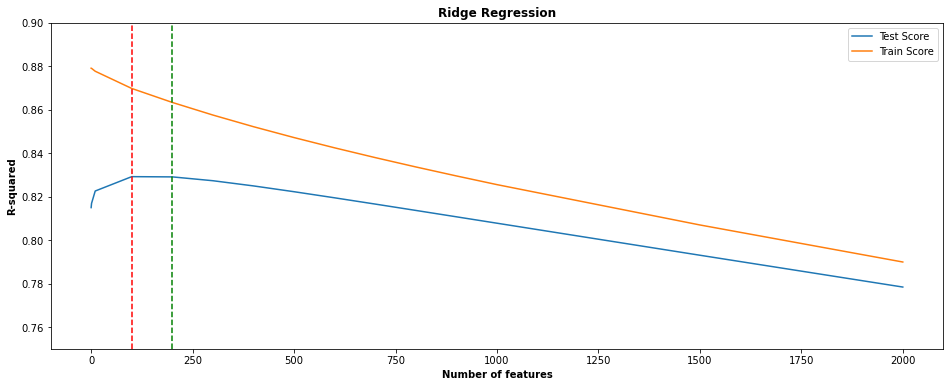

In [131]:
# Plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_ridge["param_alpha"], cv_results_ridge["mean_test_score"])
plt.plot(cv_results_ridge["param_alpha"], cv_results_ridge["mean_train_score"])
plt.xlabel('Number of features', weight = 'bold')
plt.ylabel('R-squared', weight = 'bold')
plt.axvline(x = 100, color = 'r', linestyle = '--')
plt.axvline(x = 200, color = 'g', linestyle = '--')
plt.title("Ridge Regression", weight = 'bold')
plt.legend(['Test Score', 'Train Score'], loc='upper right')
plt.ylim([0.75, 0.9])
plt.show()

In [132]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 100}


In [133]:
# Fitting Ridge model for best params and printing coefficients which have been penalised
alpha_ridge = 100
ridge = Ridge(alpha=alpha_ridge)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-5.70798729e+03  1.22654333e+03 -6.11165025e+02 -2.31829281e+03
  1.22227203e+04  4.62505238e+03 -2.96158498e+03  4.30117519e+03
  4.82370892e+03  7.90356751e+03  8.68102969e+02 -1.40371554e+02
  9.43235671e+02  2.64467434e+02  1.06132950e+04 -8.91126205e+02
  3.24291357e+03  7.85093578e+02  3.83441684e+03  1.98357454e+03
 -2.60492240e+03 -2.19159672e+03  5.23185131e+03  3.72040819e+03
  1.78913464e+03  1.70822681e+03  2.63602347e+03  5.86283668e+03
  1.59765017e+03  1.42227636e+03 -2.01714108e+02  1.09148265e+03
  1.00413322e+03  5.89899451e+02  1.19263525e+02 -1.03056029e+03
 -1.29738263e+03 -2.65416506e+03  9.14806944e+02  1.07276031e+03
  1.83861302e+03  3.75320200e+02  2.99322204e+02  1.66004348e+03
  7.22491662e+02  1.73272852e+02 -1.96464507e+03  3.66141177e+03
 -3.96985580e+03 -1.35923841e+03 -6.37213264e+02  1.14076775e+03
 -1.80234444e+03 -3.20034479e+03  3.20873180e+02 -2.15418822e+03
  8.60656376e+03  8.03810283e+03 -1.47295711e+03  1.64034419e+01
 -1.79942360e+03 -1.44051

In [134]:
# Predicting y values for Ridge model
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric1 = []

# Calculating r2 score on train set
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print(r2_train_ridge)
metric1.append(r2_train_ridge)

# Calculating r2 score on test data
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(r2_test_ridge)
metric1.append(r2_test_ridge)

# Calculating RSS value for train set
rss1_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss1_ridge)
metric1.append(rss1_ridge)

# Calculating RSS value for test set
rss2_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss2_ridge)
metric1.append(rss2_ridge)

# Calculating Mean Squared Error on train set
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print(mse_train_ridge)
metric1.append(mse_train_ridge**0.5)

# Calculating Mean squared error on test set
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
print(mse_test_ridge)
metric1.append(mse_test_ridge**0.5)

0.866340851037731
0.8479409783104435
852838771322.6765
428610669789.1642
835297523.33269
978563173.0346215


### Lasso

In [135]:
# Creating alphas to tune
params_lasso = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]}

lasso = Lasso()

# Cross Validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 200, 300, 400, 500,
                                   600, 700, 800, 900, 1000, 1500, 2000]},
             return_train_score=True, scoring='r2', verbose=1)

In [136]:
# cv results of Lasso Regression
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.161038,1.610070e-02,0.003925,0.006052,0.01,{'alpha': 0.01},0.832766,0.773918,0.768758,0.856870,0.843098,0.815082,0.036563,16,0.874266,0.887858,0.887241,0.870412,0.875440,0.879043,0.007144
1,0.155981,1.761518e-02,0.006251,0.007656,0.1,{'alpha': 0.1},0.832807,0.773935,0.768780,0.856884,0.843040,0.815089,0.036552,15,0.874266,0.887858,0.887241,0.870412,0.875440,0.879043,0.007144
2,0.153119,2.499831e-02,0.009374,0.007654,1,{'alpha': 1},0.833206,0.774104,0.768997,0.857010,0.843090,0.815282,0.036534,14,0.874263,0.887854,0.887239,0.870409,0.875438,0.879040,0.007144
3,0.093746,3.952651e-02,0.000000,0.000000,10,{'alpha': 10},0.835974,0.775509,0.771042,0.857807,0.843321,0.816731,0.036198,13,0.874174,0.887687,0.887130,0.870330,0.875373,0.878939,0.007116
4,0.028125,1.530499e-02,0.006249,0.007653,100,{'alpha': 100},0.848071,0.780994,0.784708,0.863155,0.845866,0.824559,0.034590,11,0.872291,0.886074,0.885173,0.869031,0.874141,0.877342,0.006963
5,0.018751,6.245757e-03,0.006249,0.007653,200,{'alpha': 200},0.852945,0.783611,0.792986,0.865935,0.845576,0.828210,0.033366,9,0.869802,0.884043,0.882607,0.867358,0.872058,0.875173,0.006835
6,0.021875,7.654519e-03,0.006249,0.007654,300,{'alpha': 300},0.855807,0.784913,0.799787,0.868117,0.845336,0.830792,0.032547,8,0.867797,0.882440,0.880031,0.865946,0.870451,0.873333,0.006653
7,0.018751,6.248880e-03,0.003124,0.006248,400,{'alpha': 400},0.858035,0.785190,0.801787,0.869057,0.844279,0.831670,0.032574,5,0.866009,0.880666,0.878334,0.864324,0.868748,0.871616,0.006631
8,0.025000,1.249844e-02,0.003125,0.006249,500,{'alpha': 500},0.859789,0.785418,0.803621,0.868933,0.843147,0.832182,0.032360,3,0.864307,0.878764,0.876815,0.862727,0.867183,0.869959,0.006580
9,0.015627,8.996946e-07,0.003124,0.006248,600,{'alpha': 600},0.860849,0.785053,0.805538,0.868640,0.841701,0.832356,0.032163,1,0.862666,0.876883,0.875448,0.861344,0.865394,0.868347,0.006531


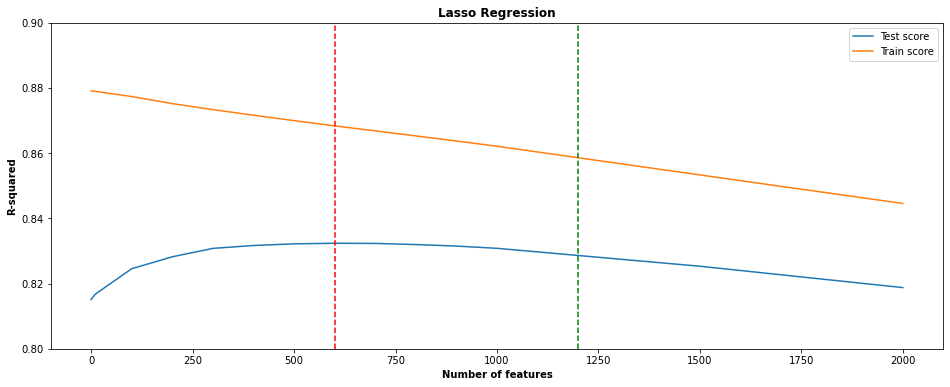

In [137]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_lasso["param_alpha"], cv_results_lasso["mean_test_score"])
plt.plot(cv_results_lasso["param_alpha"], cv_results_lasso["mean_train_score"])
plt.xlabel('Number of features', weight = 'bold')
plt.ylabel('R-squared', weight = 'bold')
plt.axvline(x = 600, color = 'r', linestyle = '--')
plt.axvline(x = 1200, color = 'g', linestyle = '--')
plt.title("Lasso Regression", weight = 'bold')
plt.legend(['Test score', 'Train score'], loc='upper right')
plt.ylim([0.8, 0.9])
plt.show()

In [138]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 600}


In [139]:
# Fitting Ridge model for best params

alpha_lasso = 600

# Creating Lasso model with best hyperparameter
lasso = Lasso(alpha=alpha_lasso)

# Fitting Lasso model to training data
lasso.fit(X_train, y_train) 

Lasso(alpha=600)

In [140]:
# Calculating some metrics such as R2 score, RSS and RMSE for both train & test sets

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

metric2 = []
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lasso)
metric2.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lasso)
metric2.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss1_lasso)
metric2.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss2_lasso)
metric2.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print(mse_train_lasso)
metric2.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print(mse_test_lasso)
metric2.append(mse_test_lasso**0.5)

0.8639425612468336
0.8481608544306249
868141536112.2535
427990902214.0837
850285539.7769378
977148178.5709673


In [141]:
# Creating a table which contain all the metrics

ridge_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge': metric1
        }

ridge_metric = pd.DataFrame(ridge_table ,columns = ['Metric', 'Ridge'] )

ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([ridge_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge,Lasso Regression
0,R2 Score (Train),8.663409e-01,8.639426e-01
1,R2 Score (Test),8.479410e-01,8.481609e-01
2,RSS (Train),8.528388e+11,8.681415e+11
3,RSS (Test),4.286107e+11,4.279909e+11
4,MSE (Train),2.890151e+04,2.915966e+04
5,MSE (Test),3.128199e+04,3.125937e+04


In [142]:
# Creating coefficients dataframe
betas = pd.DataFrame(index=X.columns)

In [143]:
# Creating rows with feature names
betas.rows = X.columns

In [144]:
# Creating two columns with coefficients of Ridge & Lasso
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [145]:
# Checking the values of coefficients
pd.set_option('display.max_rows', None)
betas.head(335)

,Ridge,Lasso
MSSubClass,-5707.987294,-5553.010335
LotShape,1226.543333,82.614678
LotConfig,-611.165025,-150.524433
HouseStyle,-2318.292811,-2320.439495
OverallQual,12222.720324,15294.435911
OverallCond,4625.052378,3974.704072
MasVnrType,-2961.584979,-0.000000
ExterQual,4301.175191,4402.057965
BsmtQual,4823.708924,4465.096762
BsmtExposure,7903.567508,8611.083132


In [146]:
# Sorting coefficients as per Ridge Regression in descending order
betas.sort_values(by = 'Ridge', ascending = False)

,Ridge,Lasso
OverallQual,12222.720324,15294.435911
2ndFlrSF,10613.294971,19859.869426
1stFlrSF_sqrt_Log,9239.784371,18148.731485
Neighborhood_NoRidge,8606.563761,9309.585206
Neighborhood_NridgHt,8038.102826,9957.476568
BsmtExposure,7903.567508,8611.083132
GrLivArea_Log,7573.082686,0.000000
LotArea_Log,7347.507664,6315.515856
GarageCars,5862.836682,6962.737888
KitchenQual,5231.851309,5716.522976


In [147]:
# Sorting coefficients as per Lasso Regression in descending order
betas.sort_values(by = 'Lasso', ascending = False)

,Ridge,Lasso
2ndFlrSF,10613.294971,19859.869426
1stFlrSF_sqrt_Log,9239.784371,18148.731485
OverallQual,12222.720324,15294.435911
Neighborhood_NridgHt,8038.102826,9957.476568
Neighborhood_NoRidge,8606.563761,9309.585206
BsmtExposure,7903.567508,8611.083132
GarageCars,5862.836682,6962.737888
LotArea_Log,7347.507664,6315.515856
Neighborhood_Somerst,4029.399541,5731.331773
KitchenQual,5231.851309,5716.522976


In [148]:
betas.shape

(119, 2)

### Lasso Regression after first five important variables are dropped

In [149]:
X_Lasso_Dropped = X.drop(['2ndFlrSF','OverallQual', 'Neighborhood_NoRidge', '1stFlrSF_sqrt_Log', 'Neighborhood_NridgHt'], axis = 1)

In [150]:
# Splitting into train and test
X_Lasso_Dropped_train, X__Lasso_Dropped_test, y_Lasso_Dropped_train, y_Lasso_Dropped_test = train_test_split(X_Lasso_Dropped,
                                                                y, train_size=0.7, test_size = 0.3, random_state=100)

In [151]:
# Creating alphas to tune
params_lasso_dropped = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]}

lasso_dropped = Lasso()

# cross validation
model_cv_lasso_dropped = GridSearchCV(estimator = lasso_dropped, 
                        param_grid = params_lasso_dropped, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso_dropped.fit(X_Lasso_Dropped_train, y_Lasso_Dropped_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 200, 300, 400, 500,
                                   600, 700, 800, 900, 1000, 1500, 2000]},
             return_train_score=True, scoring='r2', verbose=1)

In [152]:
# Finding best hyperparameter alpha
print(model_cv_lasso_dropped.best_params_)

{'alpha': 400}


In [153]:
# Fitting Ridge model for alpha = 400 and printing coefficients which have been penalised

alpha_lasso_dropped = 400

# Creating Lasso model with best hyperparameter
lasso_dropped = Lasso(alpha=alpha_lasso_dropped)

# Fitting Lasso model to training data
lasso_dropped.fit(X_Lasso_Dropped_train, y_Lasso_Dropped_train) 

Lasso(alpha=400)

In [154]:
# Creating lists of coefficients in descending order
betas_lasso_dropped = pd.DataFrame(index = X_Lasso_Dropped.columns)
betas_lasso_dropped.rows = X_Lasso_Dropped.columns
betas_lasso_dropped['Lasso_Dropped'] = lasso_dropped.coef_
betas_lasso_dropped.sort_values(by = 'Lasso_Dropped',ascending = False)

,Lasso_Dropped
GrLivArea_Log,27071.674750
LotArea_Log,9370.561178
GarageCars,9363.839860
ExterQual,8750.942622
MasVnrArea_cbrt,8364.791506
BsmtExposure,8335.003623
BsmtQual,7374.256339
KitchenQual,6894.459072
BsmtFinSF1_cbrt,6584.939865
OverallCond,6234.938894
